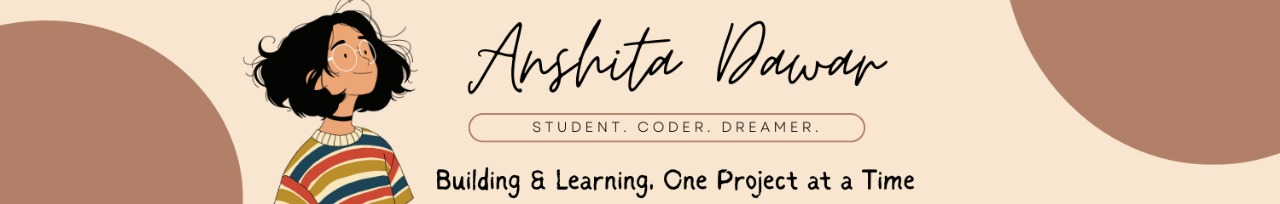

---

<!-- =============================== -->
<!-- Agenda -->
<div style="background-color:#FFFACD; padding:15px; border-radius:8px;">
<h2 style="text-align:center; font-family:'Comic Sans MS','Bradley Hand', cursive; font-weight:bold;">
Agenda - Scraping Amazon website 
</h2>

- [Importing Libraries](#Importing-Libraries)
- [Adding Headers](#Adding-Headers)
- [Requesting url](#Requesting-url)
- [Getting Response](#Getting-Response)
- [Accessing the Code](#Accessing-the-Code)
- [Prettify the Code](#Prettify-the-Code)
- [Finding All Division Class That Contains the Details](#Finding-All-Division-Class-That-Contains-the-Details)
- [Finding The Number of Division Class](#Finding-The-Number-of-Division-Class)
- [Printing Those Division Class](#Printing-Those-Division-Class)
- [Creating Empty List](#Creating-Empty-List)
- [Accessing Required Information](#Accessing-Required-Information)
- [Converting Into DataFrame](#Converting-Into-DataFrame)
- [Removing Irrelevant values](#Removing-Irrelevant-values)
- [Saving to CSV File](#Saving-to-CSV-File)
  
</div>

<!-- =============================== -->
<!-- Topic -->
<div style="background-color:#E0FFFF; padding:15px; border-radius:8px;">
<h1 style="text-align:center; font-family:'Comic Sans MS','Bradley Hand', cursive; font-weight:bold;">
Scraping website - Amazon
</h1>

</div>

### Importing Libraries

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

### Adding Headers

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
 }

### Requesting url

In [3]:
url = 'https://www.amazon.in/s?k=facewash&crid=3IVCCSS9XPVGY&sprefix=facewash%2Caps%2C236&ref=nb_sb_noss_2'
response = requests.get(url)

### Getting Response

In [4]:
if response.status_code == 200:
    print("Successfully fetched the page!")
else:
    print(f"Failed to retrieve the page. Status code:{response.status_code}")

Failed to retrieve the page. Status code:503


### Accessing the Code

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
soup

<html>
<head>
<title>503 - Service Unavailable Error</title>
</head>
<body bgcolor="#FFFFFF" text="#000000">
<!--
        To discuss automated access to Amazon data please contact api-services-support@amazon.com.
        For information about migrating to our APIs refer to our Marketplace APIs at https://developer.amazonservices.in/ref=rm_5_sv, or our Product Advertising API at https://affiliate-program.amazon.in/gp/advertising/api/detail/main.html/ref=rm_5_ac for advertising use cases.
-->
<center>
<a href="https://www.amazon.in/ref=cs_503_logo/">
<img alt="Amazon.in" border="0" height="45" src="https://images-eu.ssl-images-amazon.com/images/G/31/x-locale/communities/people/logo.gif" width="200"/></a>
<p align="center">
<font face="Verdana,Arial,Helvetica">
<font color="#CC6600" size="+2"><b>Oops!</b></font><br/>
<b>It's rush hour and traffic is piling up on that page. Please try again in a short while.<br/>If you were trying to place an order, it will not have been processed at this 

### Prettify the Code

In [7]:
print(soup.prettify())

<html>
 <head>
  <title>
   503 - Service Unavailable Error
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!--
        To discuss automated access to Amazon data please contact api-services-support@amazon.com.
        For information about migrating to our APIs refer to our Marketplace APIs at https://developer.amazonservices.in/ref=rm_5_sv, or our Product Advertising API at https://affiliate-program.amazon.in/gp/advertising/api/detail/main.html/ref=rm_5_ac for advertising use cases.
-->
  <center>
   <a href="https://www.amazon.in/ref=cs_503_logo/">
    <img alt="Amazon.in" border="0" height="45" src="https://images-eu.ssl-images-amazon.com/images/G/31/x-locale/communities/people/logo.gif" width="200"/>
   </a>
   <p align="center">
    <font face="Verdana,Arial,Helvetica">
     <font color="#CC6600" size="+2">
      <b>
       Oops!
      </b>
     </font>
     <br/>
     <b>
      It's rush hour and traffic is piling up on that page. Please try again in a short whil

### Finding All Division Class That Contains the Details

In [8]:
products=soup.find_all("div",class_="sg-col-inner")

### Finding The Number of Division Class

In [9]:
print(len(products))

0


### Printing Those Division Class

In [10]:
products


[]

### Creating Empty List

In [11]:
Facewash=[]

### Accessing required Information

In [12]:
for product in products:
    title_elem = product.h2
    if title_elem:
        title = title_elem.get_text(strip=True)
    price_elem=product.find("span",class_="a-offscreen")
    if price_elem:
        price=price_elem.get_text(strip=True)
        
    Facewash.append({
        'Title': title,
        "Price":price,
    })
    

In [13]:
print(Facewash)

[]


### Converting into DataFrame

In [14]:
df=pd.DataFrame(Facewash)

In [15]:
df

""


### Removing Irrelevant values

In [16]:

df= df[df['Title'].str.strip() != '']

irrelevant_keywords = ['results for', 'Results', 'Trending', 'Related', 'Need help',"Today's deal"]
pattern = '|'.join(irrelevant_keywords)

df = df[~df['Title'].str.contains(pattern, case=False, na=False)]


KeyError: 'Title'

In [ ]:
df = df.reset_index(drop=True)


In [ ]:
df

### Saving to CSV file

In [ ]:
df.to_csv("Amazon Facewash Details.csv")